# nyoba punya orang

In [49]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
from scipy.stats import norm
import statsmodels.api as sm
import matplotlib.pyplot as plt
from scipy.stats import skew, norm
from sklearn.neighbors import KNeighborsRegressor
%matplotlib inline

import warnings
warnings.filterwarnings(action='ignore')

# Import data

In [50]:
data_train = pd.read_csv("E:\\Lomba\\random_project\\House Prices Prediction\\house-prices-advanced-regression-techniques\\train.csv")
data_test = pd.read_csv("E:\\Lomba\\random_project\\House Prices Prediction\\house-prices-advanced-regression-techniques\\test.csv")

data_w = data_train.copy()
data_w.columns = data_w.columns.str.replace(' ','')
data_w.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [51]:
data_w.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# EDA

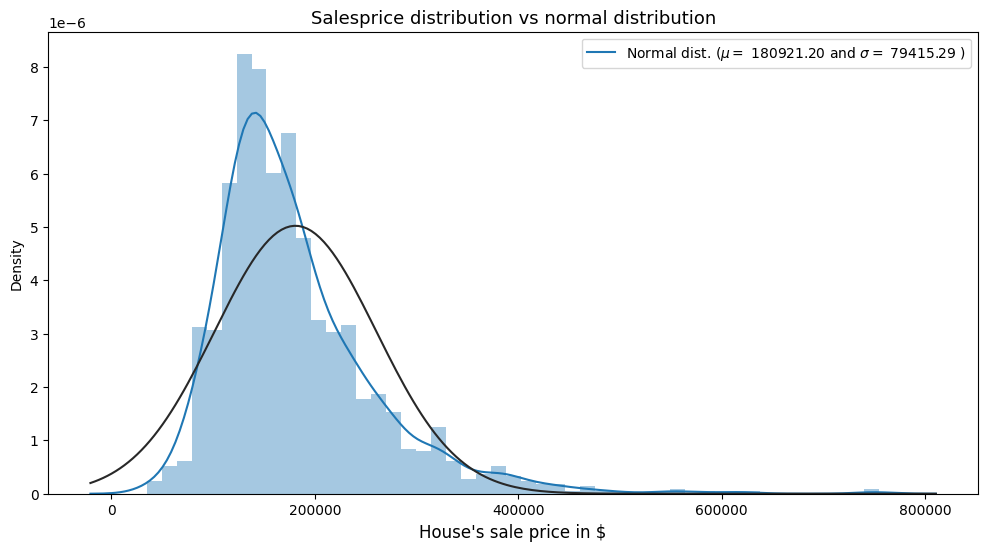

In [52]:
# var y vs normal distribution

(mu,sigma) = norm.fit(data_w['SalePrice'])

plt.figure(figsize=(12,6))
sns.distplot(data_w['SalePrice'], kde = True, hist=True, fit = norm)
plt.title('Salesprice distribution vs normal distribution',fontsize=13)
plt.xlabel("House's sale price in $",fontsize=12)
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.show()

In [53]:
# skew and kurt
from scipy import stats

shap_t,shap_p = stats.shapiro(data_w['SalePrice'])

print('Skewness : %f' % abs(data_w['SalePrice']).skew())
print('Kurtosis :%f'% abs(data_w['SalePrice']).kurt())
print('shapiro_test :  %f'%shap_t)
print('shapiro_test :  %f'%shap_p)

Skewness : 1.882876
Kurtosis :6.536282
shapiro_test :  0.869671
shapiro_test :  0.000000


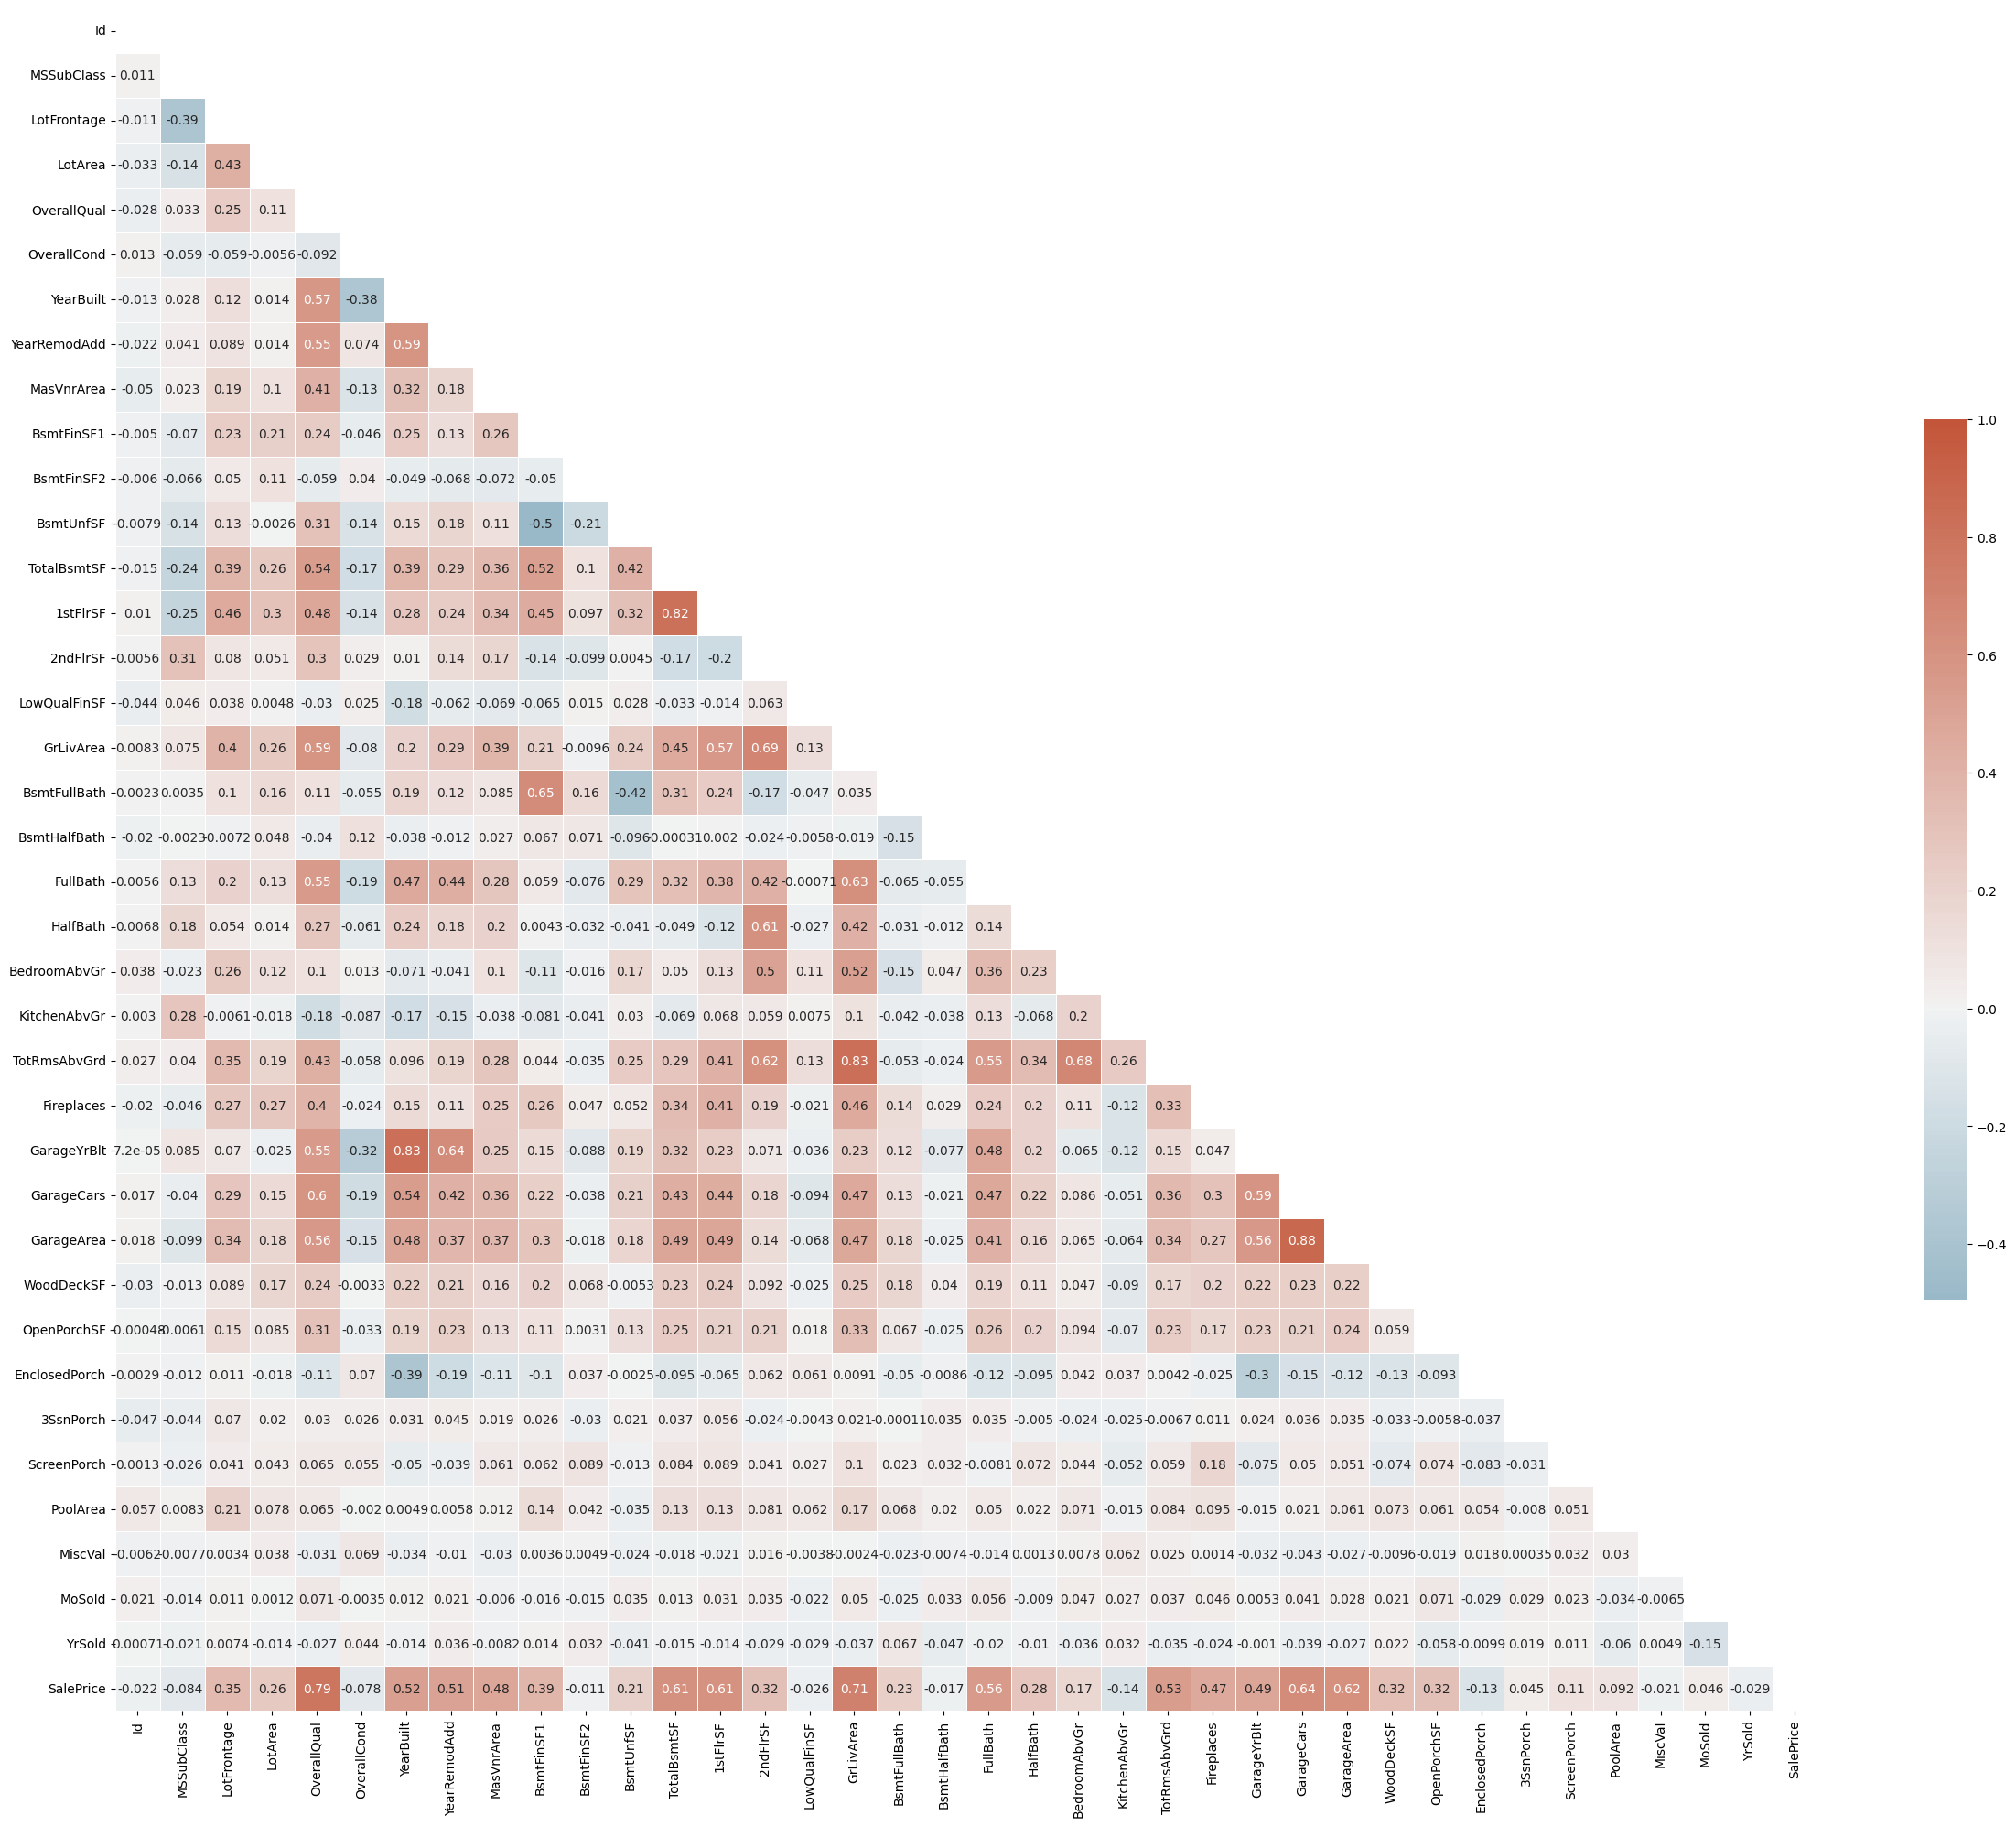

In [54]:
# correlation matrix
f,ax = plt.subplots(figsize=(30,25))
mat = data_w.corr(method='pearson',numeric_only=True)
mask = np.triu(np.ones_like(mat,dtype=bool))

sns.heatmap(
    mat,mask=mask,
    cmap=sns.diverging_palette(230,20,as_cmap=True),
    vmax=1,center=0,annot=True,square=True,
    linewidths=.5,cbar_kws={'shrink': .5}
)
plt.show()

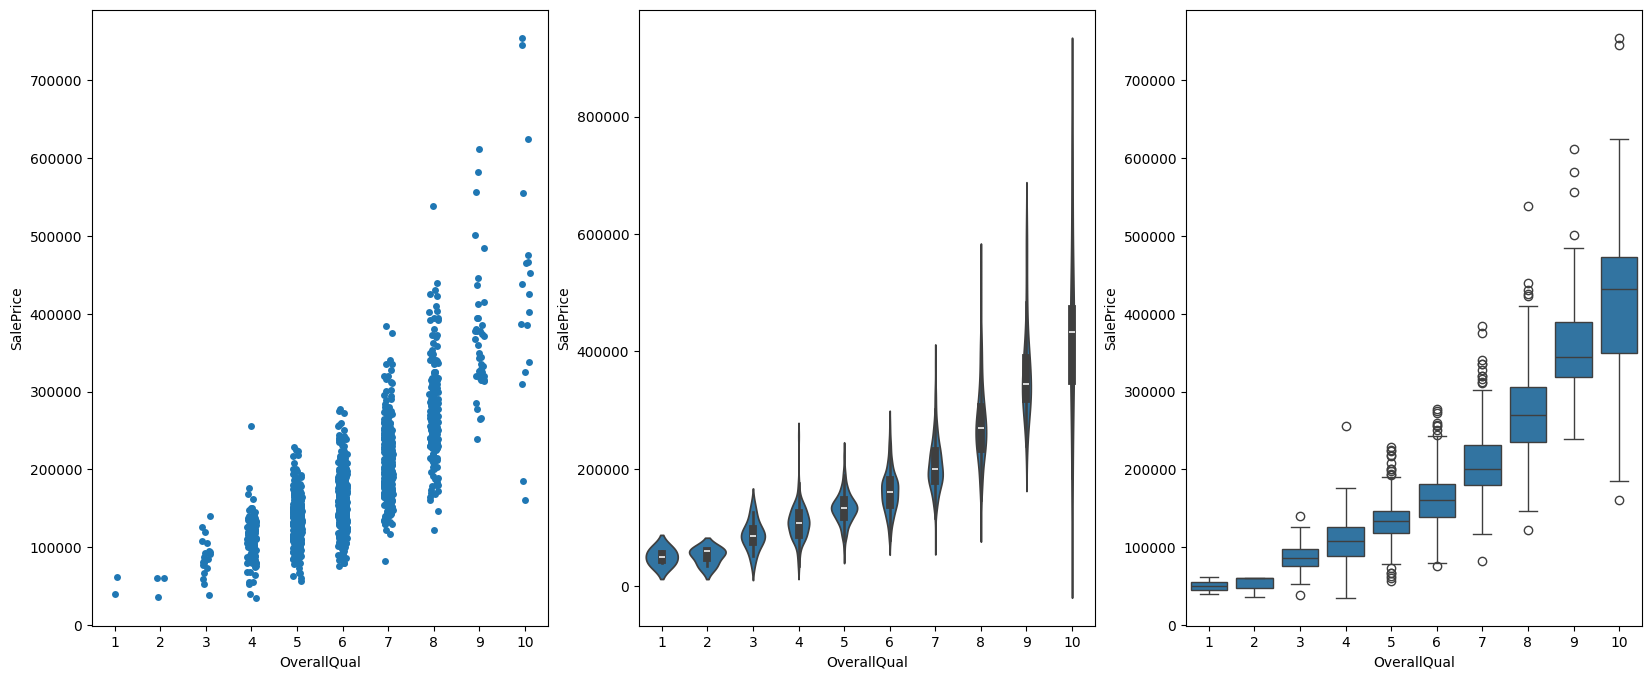

In [55]:
# OveralCond with SalePrice = 0.79

figure,ax = plt.subplots(1,3,figsize=(20,8))
sns.stripplot(data=data_w,x='OverallQual',y='SalePrice',ax = ax[0])
sns.violinplot(data=data_w,x='OverallQual',y='SalePrice',ax = ax[1])
sns.boxplot(data=data_w,x='OverallQual',y='SalePrice',ax = ax[2])
plt.show()

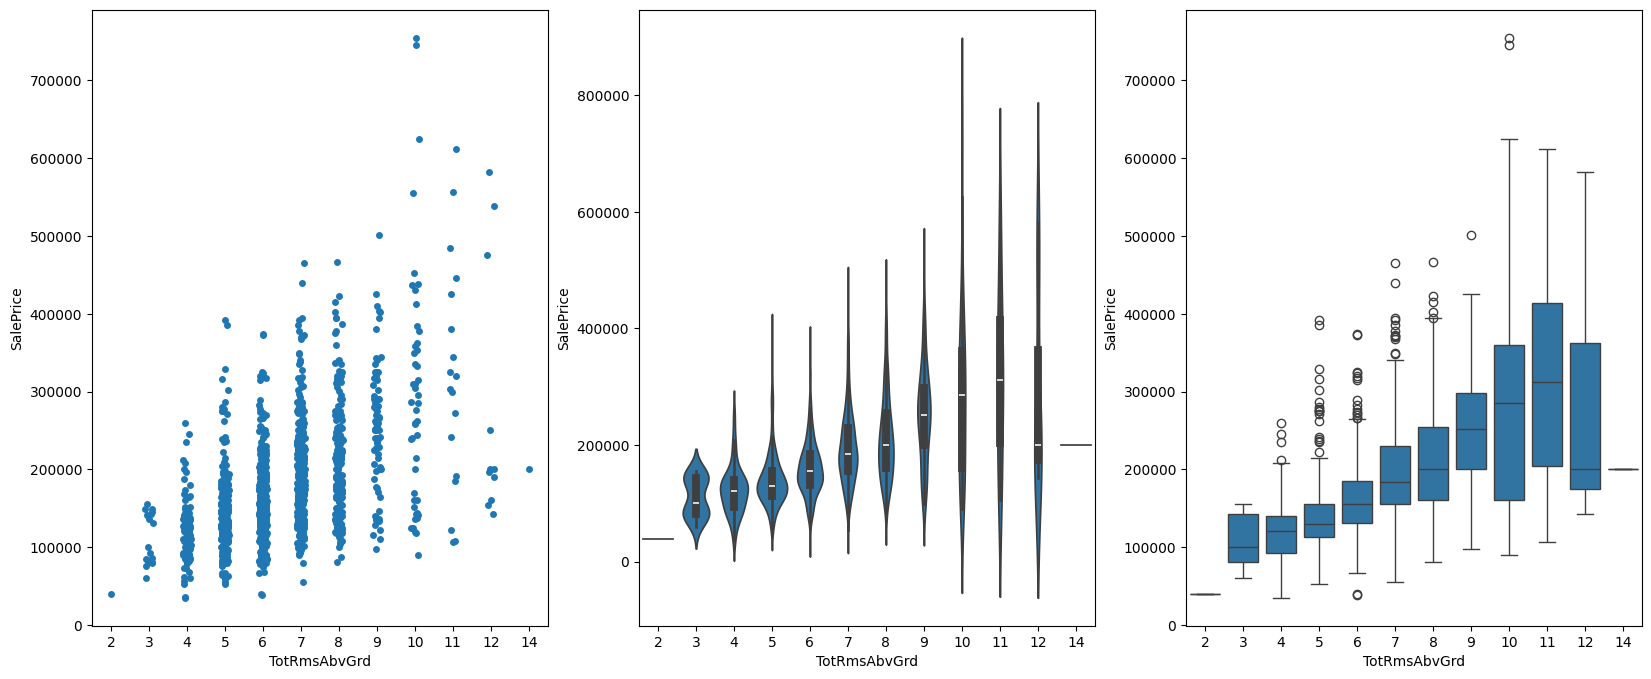

In [56]:
# TotRmsAbvGrd with SalePrice = 0.53

figure,ax = plt.subplots(1,3,figsize=(20,8))
sns.stripplot(data=data_w,x='TotRmsAbvGrd',y='SalePrice',ax= ax[0])
sns.violinplot(data=data_w,x='TotRmsAbvGrd',y='SalePrice',ax = ax[1])
sns.boxplot(data=data_w,x='TotRmsAbvGrd',y='SalePrice',ax = ax[2])
plt.show()

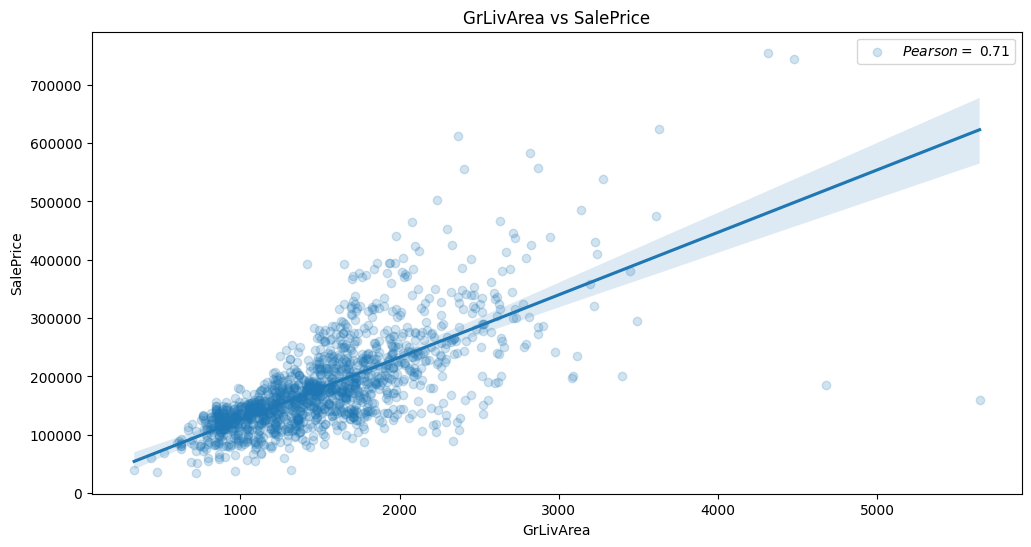

In [57]:
# GrLivArea with SalePrice = 0.71

Pearson_GrLiv = 0.71
plt.figure(figsize=(12,6))
sns.regplot(data=data_w,x='GrLivArea',y='SalePrice',scatter_kws={'alpha':0.2})
plt.title('GrLivArea vs SalePrice',fontsize=12)
plt.legend(['$Pearson=$ {:.2f}'.format(Pearson_GrLiv)],loc = 'best')
plt.show()

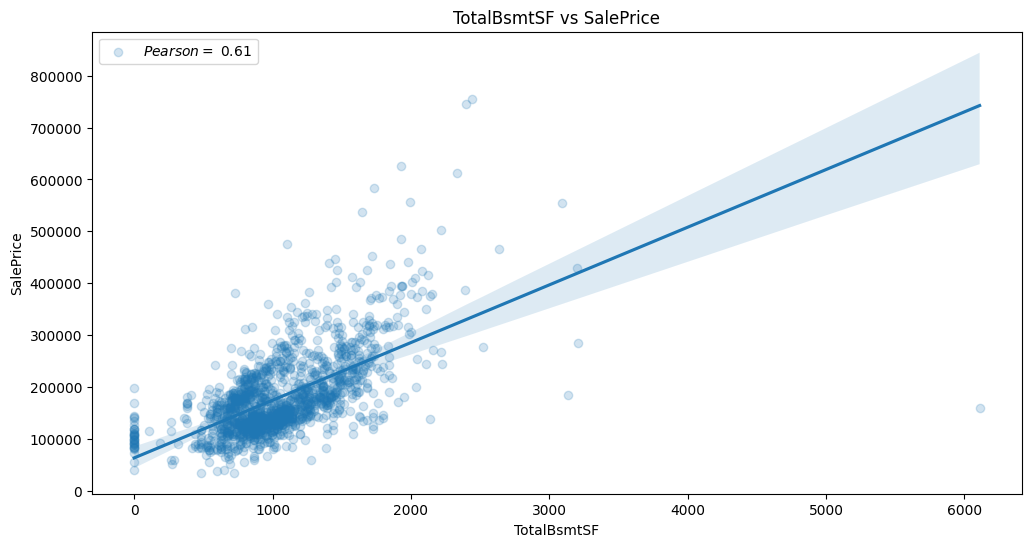

In [58]:
# TotalBsmtSF with SalePrice = 0.61

Pearson_TBSF = 0.61
plt.figure(figsize=(12,6))
sns.regplot(data=data_w,x='TotalBsmtSF',y='SalePrice',scatter_kws={'alpha':0.2})
plt.title('TotalBsmtSF vs SalePrice',fontsize=12)
plt.legend(['$Pearson=$ {:.2f}'.format(Pearson_TBSF)],loc = 'best')
plt.show()

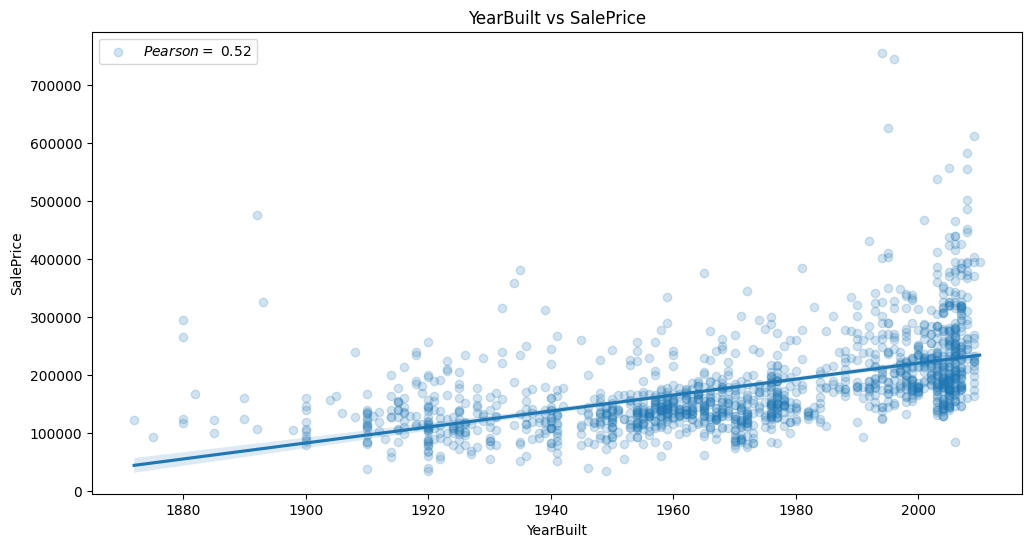

In [59]:
# YearBuilt with SalePrice = 0.52

Pearson_YB = 0.52
plt.figure(figsize=(12,6))
sns.regplot(data=data_w,x='YearBuilt',y='SalePrice',scatter_kws={'alpha':0.2})
plt.title('YearBuilt vs SalePrice',fontsize=12)
plt.legend(['$Pearson=$ {:.2f}'.format(Pearson_YB)],loc = 'best')
plt.show()

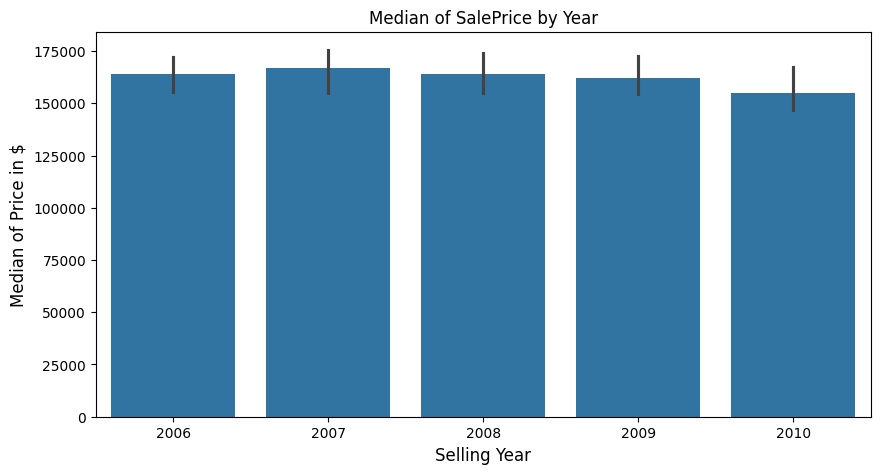

In [60]:
# Median of SalePrice by Year

plt.figure(figsize=(10,5))
sns.barplot(x='YrSold',y='SalePrice',data=data_w,estimator=np.median)
plt.title('Median of SalePrice by Year',fontsize=12)
plt.xlabel('Selling Year',fontsize=12)
plt.ylabel('Median of Price in $',fontsize=12)
plt.show()

# Data Preprocessing

In [61]:
data_test

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [62]:
data_test

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [63]:
# Separating target and features
target = data_w['SalePrice']
test_id = data_test['Id']
data_test = data_test.drop(['Id'],axis=1)

data_w2 = data_w.drop(['SalePrice'],axis=1)

# concatenating train and test set
train_test = pd.concat([data_w2,data_test],axis=0,sort=False)
train_test

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1.0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,2.0,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,3.0,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,4.0,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,5.0,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,NaN,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,NaN,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,NaN,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,NaN,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [64]:
# Looking at NaN % within the data

nan = pd.DataFrame(train_test.isna().sum(), columns = ['NaN_sum'])
nan['feat'] = nan.index
nan['Perc(%)'] = (nan['NaN_sum']/1460)*100
nan = nan[nan['NaN_sum'] > 0]
nan = nan.sort_values(by = ['NaN_sum'])
nan['Usability'] = np.where(nan['Perc(%)'] > 20, 'Discard', 'Keep')
nan

,NaN_sum,feat,Perc(%),Usability
TotalBsmtSF,1,TotalBsmtSF,0.068493,Keep
GarageArea,1,GarageArea,0.068493,Keep
GarageCars,1,GarageCars,0.068493,Keep
KitchenQual,1,KitchenQual,0.068493,Keep
Electrical,1,Electrical,0.068493,Keep
BsmtUnfSF,1,BsmtUnfSF,0.068493,Keep
BsmtFinSF2,1,BsmtFinSF2,0.068493,Keep
BsmtFinSF1,1,BsmtFinSF1,0.068493,Keep
SaleType,1,SaleType,0.068493,Keep
Exterior1st,1,Exterior1st,0.068493,Keep


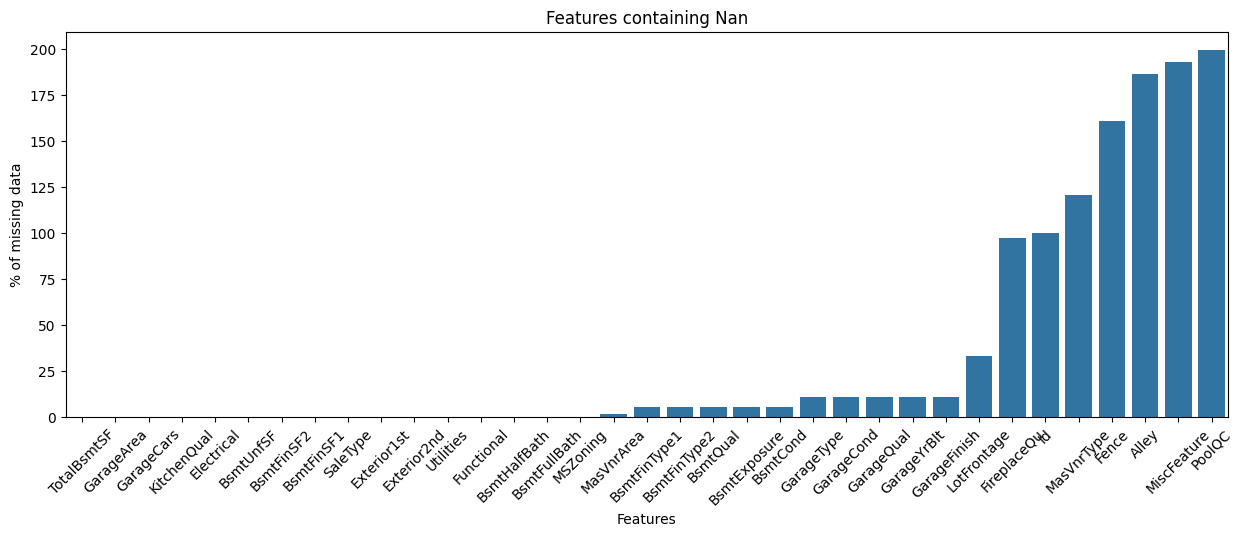

In [65]:
# Plotting nan

plt.figure(figsize= (15,5))
sns.barplot(x = nan['feat'], y = nan['Perc(%)'])
plt.xticks(rotation=45)
plt.title('Features containing Nan')
plt.xlabel('Features')
plt.ylabel("% of missing data")
plt.show()

In [66]:
# converting non-numeric predictors stored as numbers into string

train_test['MSSubClass'] = train_test['MSSubClass'].apply(str)
train_test['YrSold'] = train_test['YrSold'].apply(str)
train_test['MoSold'] = train_test['MoSold'].apply(str)

In [67]:
# Filling categorical Nan (that we know how to fill due to the description file)

train_test['Functional'] = train_test['Functional'].fillna('Typ')
train_test['Electrical'] = train_test['Electrical'].fillna('SBrkr')
train_test['KitchenQual'] = train_test['KitchenQual'].fillna('TA')
train_test['Exterior1st'] = train_test['Exterior1st'].fillna(train_test['Exterior1st'].mode()[0])
train_test['Exterior2nd'] = train_test['Exterior2nd'].fillna(train_test['Exterior2nd'].mode()[0])
train_test['SaleType'] = train_test['SaleType'].fillna(train_test['SaleType'].mode()[0])
train_test['PoolQC'] = train_test['PoolQC'].fillna('None')
train_test['Alley'] = train_test['Alley'].fillna('None')
train_test['FireplaceQu'] = train_test['FireplaceQu'].fillna('None')
train_test['Fence'] = train_test['Fence'].fillna('None')
train_test['MiscFeature'] = train_test['MiscFeature'].fillna('None')



In [68]:
for col in ('GarageArea','GarageCars'):
    train_test[col] = train_test[col].fillna(0)

for col in ['GarageType','GarageFinish','GarageQual','GarageCond']:
    train_test[col] = train_test[col].fillna('None')

for col in ('BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2'):
    train_test[col] = train_test[col].fillna('None')

# checking the feature with NaN remained out
for col in train_test:
    if train_test[col].isna().sum() > 0:
        print(train_test[col][0])

0    1.0
0    NaN
Name: Id, dtype: float64
0    RL
0    RH
Name: MSZoning, dtype: object
0    65.0
0    80.0
Name: LotFrontage, dtype: float64
0    AllPub
0    AllPub
Name: Utilities, dtype: object
0    BrkFace
0        NaN
Name: MasVnrType, dtype: object
0    196.0
0      0.0
Name: MasVnrArea, dtype: float64
0    706.0
0    468.0
Name: BsmtFinSF1, dtype: float64
0      0.0
0    144.0
Name: BsmtFinSF2, dtype: float64
0    150.0
0    270.0
Name: BsmtUnfSF, dtype: float64
0    856.0
0    882.0
Name: TotalBsmtSF, dtype: float64
0    1.0
0    0.0
Name: BsmtFullBath, dtype: float64
0    0.0
0    0.0
Name: BsmtHalfBath, dtype: float64
0    2003.0
0    1961.0
Name: GarageYrBlt, dtype: float64


In [69]:
train_test

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1.0,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,...,0,0,None,None,None,0,2,2008,WD,Normal
1,2.0,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,...,0,0,None,None,None,0,5,2007,WD,Normal
2,3.0,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,...,0,0,None,None,None,0,9,2008,WD,Normal
3,4.0,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,...,0,0,None,None,None,0,2,2006,WD,Abnorml
4,5.0,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,...,0,0,None,None,None,0,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,NaN,160,RM,21.0,1936,Pave,None,Reg,Lvl,AllPub,...,0,0,None,None,None,0,6,2006,WD,Normal
1455,NaN,160,RM,21.0,1894,Pave,None,Reg,Lvl,AllPub,...,0,0,None,None,None,0,4,2006,WD,Abnorml
1456,NaN,20,RL,160.0,20000,Pave,None,Reg,Lvl,AllPub,...,0,0,None,None,None,0,9,2006,WD,Abnorml
1457,NaN,85,RL,62.0,10441,Pave,None,Reg,Lvl,AllPub,...,0,0,None,MnPrv,Shed,700,7,2006,WD,Normal


In [70]:
# removing the useless variables

useless = ['GarageYrBlt','YearRemodAdd']
train_test = train_test.drop(useless,axis=1)

# imputing with KnnRegressor (also use different method of imputing)

def impute_knn(df):
    ttn = train_test.select_dtypes(include=[np.number])
    ttc = train_test.select_dtypes(exclude=[np.number])

    cols_nan = ttn.columns[ttn.isna().any()].tolist()
    cols_no_nan = ttn.columns.difference(cols_nan).values

    for col in cols_nan:
        imp_test = ttn[ttn[col].isna()]
        imp_train = ttn.dropna()
        
        model = KNeighborsRegressor(n_neighbors=5)
        knr = model.fit(imp_train[cols_no_nan],imp_train[col])
        ttn.loc[ttn[col].isna(), col] = knr.predict(imp_test[cols_no_nan])

    return pd.concat([ttn,ttc],axis=1)

train_test = impute_knn(train_test)
#train_test
    

In [71]:
objects = []
for i in train_test.columns:
    if train_test[i].dtype == objects:
        objects.append(i)
train_test.update(train_test[objects].fillna('None'))

# checking NAN presence
for col in train_test:
    if train_test[col].isna().sum() > 0:
        print(train_test[col][0])

0    RL
0    RH
Name: MSZoning, dtype: object
0    AllPub
0    AllPub
Name: Utilities, dtype: object
0    BrkFace
0        NaN
Name: MasVnrType, dtype: object


# Feature Engireering

In [72]:
# First part remains the same
train_test['SqFtPerRoom'] = train_test['GrLivArea'] / (train_test['TotRmsAbvGrd'] + train_test['FullBath'] + train_test['HalfBath'] + train_test['KitchenAbvGr'])
train_test['Total_Home_Quality'] = train_test['OverallQual'] + train_test['OverallCond']
train_test['Total_Bathrooms'] = (train_test['FullBath'] + (0.5 * train_test['BsmtHalfBath']))
train_test['HighQualSF'] = train_test['1stFlrSF'] + train_test['2ndFlrSF']


In [73]:
# Converting non-numeric predictors stored as numbers into string
train_test['MSSubClass'] = train_test['MSSubClass'].apply(str)
train_test['YrSold'] = train_test['YrSold'].apply(str)
train_test['MoSold'] = train_test['MoSold'].apply(str)

In [74]:
# creating dummy variables from categorica features
train_test_dummy = pd.get_dummies(train_test)

# fetch all numeric features
# filter to only include float and int columns (exclude bool columns)
numeric_features = train_test_dummy.select_dtypes(include=['float64','int64']).columns

# compute skewness only on non-boolean numeric features
skewed_features = train_test_dummy[numeric_features].apply(lambda x: skew(x)).sort_values(ascending=False)
high_skew = skewed_features[skewed_features > 0.5]
skew_index = high_skew.index

# normalize skewed featurs using log transformation
for i in skew_index:
    train_test_dummy[i] = np.log1p(train_test_dummy[i])

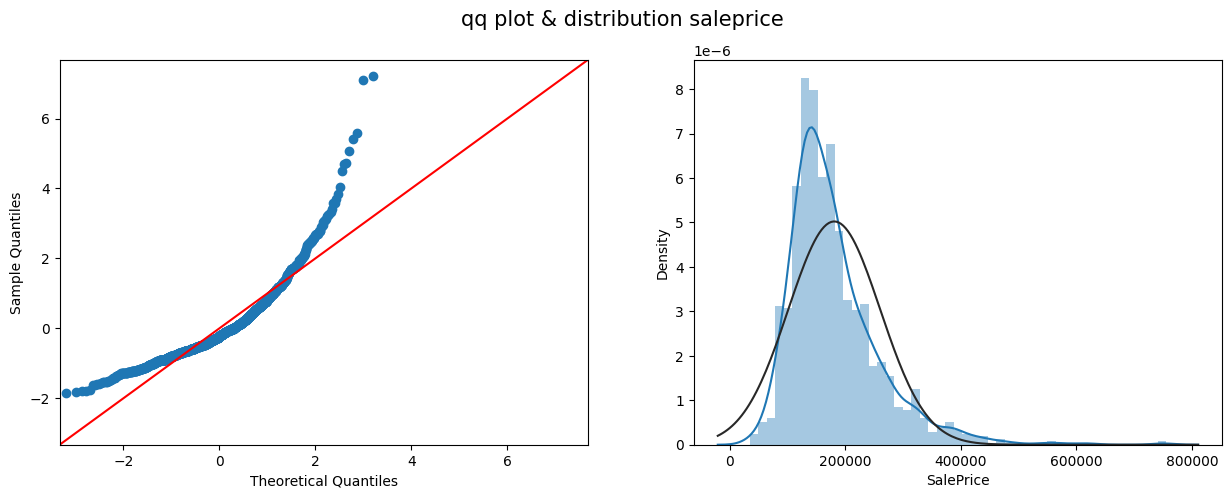

In [75]:
# sale before transformation
fig,ax = plt.subplots(1,2,figsize=(15,5))
fig.suptitle('qq plot & distribution saleprice',fontsize=15)

sm.qqplot(target,stats.t,distargs=(4,),fit=True,line='45',ax=ax[0])

sns.distplot(target,kde=True,hist=True,fit=norm,ax=ax[1])
plt.show()

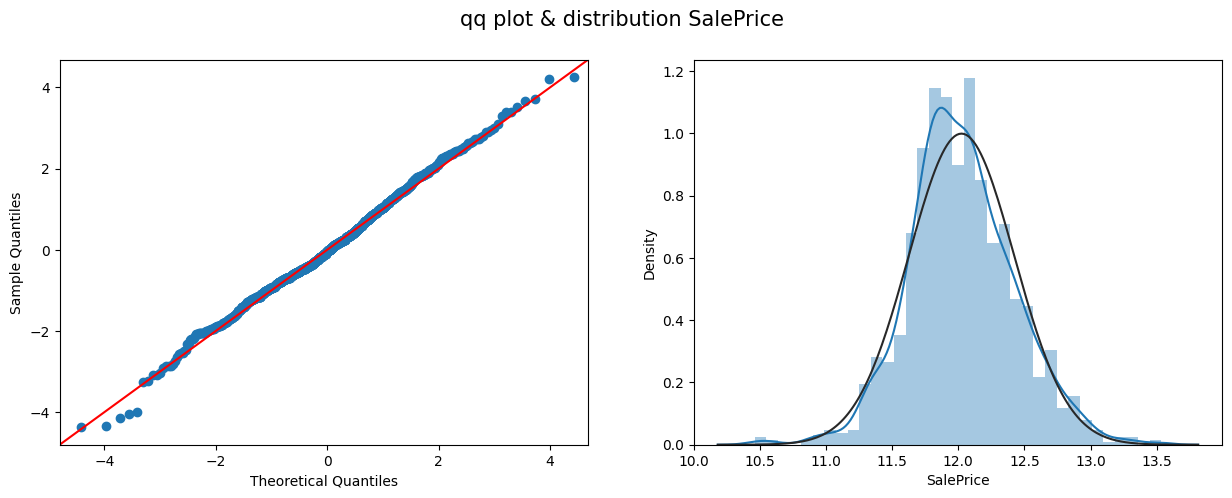

In [76]:
# saleprice after transformation
target_log = np.log1p(target)

fig,ax = plt.subplots(1,2,figsize=(15,5))
fig.suptitle('qq plot & distribution SalePrice',fontsize=15)

sm.qqplot(target_log,stats.t,distargs=(4,),fit=True,line='45',ax=ax[0])
sns.distplot(target_log,kde=True,hist=True,fit=norm,ax=ax[1])
plt.show()

In [77]:
import shap
import xgboost as xgb
from catboost import Pool
from sklearn.svm import SVR
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeRegressor
from mlxtend.regressor import StackingRegressor
from sklearn.linear_model import LinearRegression, BayesianRidge
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_squared_log_error

In [78]:
# train test separation

train = train_test_dummy.iloc[:1460,:]
test = target_log
#test['Id'] = test_id

# creation of the RMSE metric

def rmse(y,y_pred):
    return np.sqrt(mean_squared_error(y,y_pred))
def cv_rmse(model):
    rmse = np.sqrt(-cross_val_score(model,train,target_log,scoring='neg_mean_squared_error',cv=kf))
    return (rmse)

In [79]:
print(train.shape)       # Harusnya (1460, n_features)
print(target_log.shape)  # Harusnya (1460,)

(1460, 334)
(1460,)


In [80]:
print()

# Model selection

In [81]:
# 5 fold cross validation
kf = KFold(n_splits=5,random_state=42,shuffle=True)

cv_scores = []
cv_std = []

baseline_models = ['Linear_Reg.','bayesian_Ridge_Reg.','LGBM_Reg.','SVR.',
                   'Dec_Tree_Reg.','Random_Forest_Reg.','XGB_Reg.',
                   'Grad_Boost_Reg.','Cat_Boost_Reg.','Stacked_Reg.']


# Linier Regression
lreg = LinearRegression()
score_lreg = cv_rmse(lreg)
cv_scores.append(score_lreg.mean())
cv_std.append(score_lreg.std())

# Bayesian Ridge Regression
brr = BayesianRidge(compute_score=True)
score_brr = cv_rmse(brr)
cv_scores.append(score_brr.mean())
cv_std.append(score_brr.std())

# Light Gradient Boost Regressor
l_gbm = LGBMRegressor(objective='regression')
score_l_gbm = cv_rmse(l_gbm)
cv_scores.append(score_l_gbm.mean())
cv_std.append(score_l_gbm.std())

# Support Vector Regression
svr = SVR()
score_svr = cv_rmse(svr)
cv_scores.append(score_svr.mean())
cv_std.append(score_svr.std())

# Decision Tree Regressor
dtr = DecisionTreeRegressor()
score_dtr = cv_rmse(dtr)
cv_scores.append(score_dtr.mean())
cv_std.append(score_dtr.std())

# Random Forest Regressor
rfr = RandomForestRegressor()
score_rfr = cv_rmse(rfr)
cv_scores.append(score_rfr.mean())
cv_std.append(score_rfr.std())

# XGB Regressor
xgb = xgb.XGBRegressor()
score_xgb = cv_rmse(xgb)
cv_scores.append(score_xgb.mean())
cv_std.append(score_xgb.std())

# Gradient Boost Regressor
gbr = GradientBoostingRegressor()
score_gbr = cv_rmse(gbr)
cv_scores.append(score_gbr.mean())
cv_std.append(score_gbr.std())

# Cat Boost Regressor
catb = CatBoostRegressor()
score_catb = cv_rmse(catb)
cv_scores.append(score_catb.mean())
cv_std.append(score_catb.std())

# Stacked Regressor
stack_gen = StackingRegressor(regressors=(CatBoostRegressor(),
                              LinearRegression(),
                              BayesianRidge(),
                              GradientBoostingRegressor()),
                              meta_regressor = CatBoostRegressor(),
                              use_features_in_secondary=True)

score_stack_gen = cv_rmse(stack_gen)
cv_scores.append(score_stack_gen.mean())
cv_std.append(score_stack_gen.std())

final_cv_score = pd.DataFrame(baseline_models,columns=['Regressors'])
final_cv_score['RMSE_mean'] = cv_scores
final_cv_score['RMSE_std'] = cv_std

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0,000802 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3916
[LightGBM] [Info] Number of data points in the train set: 1168, number of used features: 219
[LightGBM] [Info] Start training from score 12,030658
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0,001469 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3909
[LightGBM] [Info] Number of data points in the train set: 1168, number of used features: 222
[LightGBM] [Info] Start training from score 12,016898
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM]

In [82]:
final_cv_score

,Regressors,RMSE_mean,RMSE_std
0,Linear_Reg.,0.146197,0.019159
1,bayesian_Ridge_Reg.,0.130825,0.019108
2,LGBM_Reg.,0.137314,0.016920
3,SVR.,0.280995,0.018797
4,Dec_Tree_Reg.,0.211371,0.013010
5,Random_Forest_Reg.,0.145825,0.020111
6,XGB_Reg.,0.148905,0.016866
7,Grad_Boost_Reg.,0.136796,0.019857
8,Cat_Boost_Reg.,0.124396,0.018708
9,Stacked_Reg.,0.121892,0.018389


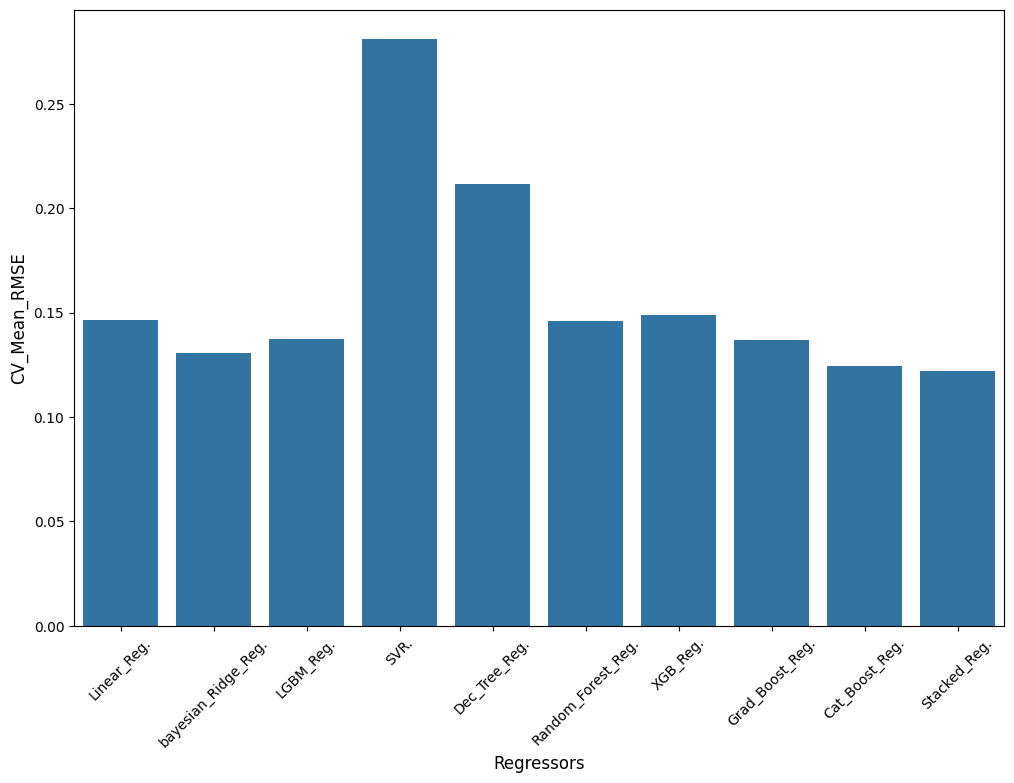

In [83]:
plt.figure(figsize=(12,8))
sns.barplot(x='Regressors',y='RMSE_mean',data=final_cv_score)
plt.xlabel('Regressors',fontsize=12)
plt.ylabel('CV_Mean_RMSE',fontsize=12)
plt.xticks(rotation=45)
plt.show()

In [84]:
# Train test split the data

X_train,X_val,y_train,y_val = train_test_split(train,target_log,test_size=0.1,random_state=42)

# cat boost regressor
cat = CatBoostRegressor()
cat_model = cat.fit(X_train,y_train,
                    eval_set= (X_val,y_val),
                    plot=True,
                    verbose=0)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [85]:
cat_pred = cat_model.predict(X_val)
cat_score = rmse(y_val,cat_pred)
cat_score

0.10842928891589862

In [86]:
# Features importance of our model
feat_imp = cat_model.get_feature_importance(prettified=True)
feat_imp

,Feature Id,Importances
0,OverallQual,13.993388
1,HighQualSF,8.657722
2,GrLivArea,7.278707
3,Total_Home_Quality,6.164624
4,YearBuilt,5.663540
...,...,...
329,MiscFeature_Gar2,0.000000
330,MiscFeature_None,0.000000
331,MiscFeature_Othr,0.000000
332,MiscFeature_TenC,0.000000


In [87]:
# Catboost default parameters
cat_model.get_all_params()

{'nan_mode': 'Min',
 'eval_metric': 'RMSE',
 'iterations': 1000,
 'sampling_frequency': 'PerTree',
 'leaf_estimation_method': 'Newton',
 'random_score_type': 'NormalWithModelSizeDecrease',
 'grow_policy': 'SymmetricTree',
 'penalties_coefficient': 1,
 'boosting_type': 'Plain',
 'model_shrink_mode': 'Constant',
 'feature_border_type': 'GreedyLogSum',
 'bayesian_matrix_reg': 0.10000000149011612,
 'eval_fraction': 0,
 'force_unit_auto_pair_weights': False,
 'l2_leaf_reg': 3,
 'random_strength': 1,
 'rsm': 1,
 'boost_from_average': True,
 'model_size_reg': 0.5,
 'pool_metainfo_options': {'tags': {}},
 'subsample': 0.800000011920929,
 'use_best_model': True,
 'random_seed': 0,
 'depth': 6,
 'posterior_sampling': False,
 'border_count': 254,
 'classes_count': 0,
 'auto_class_weights': 'None',
 'sparse_features_conflict_fraction': 0,
 'leaf_estimation_backtracking': 'AnyImprovement',
 'best_model_min_trees': 1,
 'model_shrink_rate': 0,
 'min_data_in_leaf': 1,
 'loss_function': 'RMSE',
 'learn

# Final Training

In [88]:
# Final Cat-Boost Regressor

params = {'iterations': 6000,
          'learning_rate': 0.005,
          'depth': 4,
          'l2_leaf_reg': 1,
          'eval_metric':'RMSE',
          'early_stopping_rounds': 200,
          'verbose': 200,
          'random_seed': 42}
         
cat_f = CatBoostRegressor(**params)
cat_model_f = cat_f.fit(X_train,y_train,
                     eval_set = (X_val,y_val),
                     plot=True,
                     verbose = False)

catf_pred = cat_model_f.predict(X_val)
catf_score = rmse(y_val, catf_pred)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [89]:
catf_score

0.10897998485852173

# Submission

In [90]:
# test csv submission

test_pred = cat_f.predict(test)
submission = pd.DataFrame(test_id,columns=['Id'])
test_pred = np.expm1(test_pred)
submission['SalePrice'] = test_pred
submission.head()

,Id,SalePrice
0,1461,204217.606886
1,1462,204217.606886
2,1463,204217.606886
3,1464,204217.606886
4,1465,204217.606886


In [91]:
# Save the results

submission.to_csv('submission_2.csv',index=False,header=True)